In [3]:
!python ../software_install.py

     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
vim is already the newest version (2:8.0.1453-1ubuntu1.4).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
import fastai
fastai.__version__

'2.3.1'

In [4]:
from fastai.vision.all import *
from nbdev import *

In [6]:
path = untar_data(URLs.PETS)
path = Path('/root/.fastai/data/oxford-iiit-pet')

Path.BASE_PATH = path

print (path.ls())

pets = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224,min_scale=0.75),
)

dls = pets.dataloaders(path/'images')

# print (pets.summary(path/'images'))

learn = cnn_learner(dls,resnet34,metrics=error_rate)

[Path('images'), Path('annotations')]


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [7]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.479157,0.332635,0.106901,01:02


epoch,train_loss,valid_loss,error_rate,time
0,0.457644,0.292369,0.101489,01:05
1,0.418646,0.335738,0.105548,01:05
2,0.290294,0.298607,0.093369,01:05
3,0.175195,0.235625,0.066306,01:05
4,0.113058,0.233920,0.066982,01:05


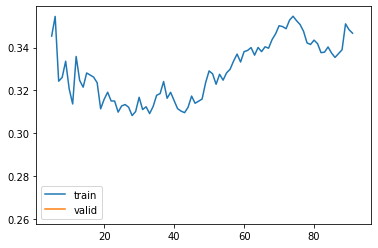

In [13]:
learn.recorder.plot_loss()

In [4]:
type(learn.recorder.values)

list

In [15]:
output = learn.recorder.values;output

[(#3) [0.34675532579421997,0.26225876808166504,0.08795669674873352]]

In [16]:
len(output)

1

In [17]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.241697,0.257017,0.081191,01:08


epoch,train_loss,valid_loss,error_rate,time
0,0.242101,0.261330,0.080514,01:10
1,0.253020,0.454989,0.116373,01:10
2,0.201922,0.257488,0.073072,01:10
3,0.125380,0.246773,0.069689,01:09
4,0.080592,0.242718,0.069012,01:10


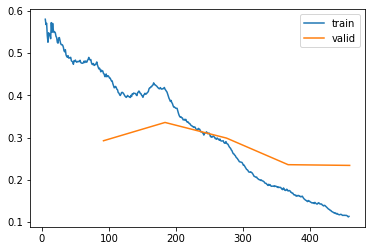

In [9]:
learn.recorder.plot_loss()

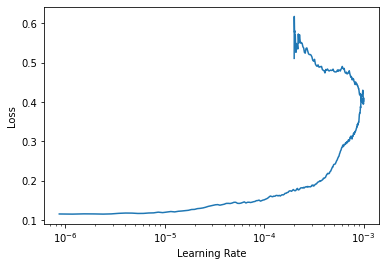

In [10]:
learn.recorder.plot_lr_find()

In [21]:
show_doc(learn.fine_tune)

<h4 id="Learner.fine_tune" class="doc_header"><code>Learner.fine_tune</code><a href="https://github.com/fastai/fastai/tree/master/fastai/callback/schedule.py#L151" class="source_link" style="float:right">[source]</a></h4>

> <code>Learner.fine_tune</code>(**`epochs`**, **`base_lr`**=*`0.002`*, **`freeze_epochs`**=*`1`*, **`lr_mult`**=*`100`*, **`pct_start`**=*`0.3`*, **`div`**=*`5.0`*, **`lr_max`**=*`None`*, **`div_final`**=*`100000.0`*, **`wd`**=*`None`*, **`moms`**=*`None`*, **`cbs`**=*`None`*, **`reset_opt`**=*`False`*)

Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR

In [11]:
learn.fine_tune??

Signature: learn.fine_tune(epochs, base_lr=0.002, freeze_epochs=1, lr_mult=100, pct_start=0.3, div=5.0, lr_max=None, div_final=100000.0, wd=None, moms=None, cbs=None, reset_opt=False)
Source:   
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `freeze` for `freeze_epochs` then with `unfreeze` from `epochs` using discriminative LR"
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
File:      /usr/local/lib/python3.7/dist-packages/fastai/callback/schedule.py
Type:      method


In [18]:
abyssinian_img_path = path/"images"/"Abyssinian_102.jpg"

In [20]:
db1 = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_y=parent_label,
    item_tfms=Resize(460),
)

In [21]:
path.cwd()

Path('/content/drive/MyDrive/colab/fastbook_my_run/reimplementation')

In [22]:
dls1 = db1.dataloaders([abyssinian_img_path]*100,bs=8)

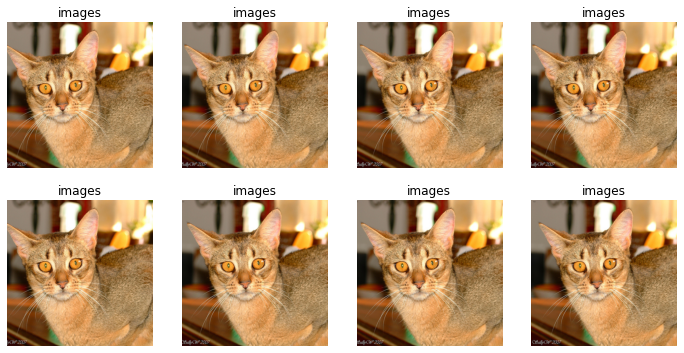

In [23]:
dls1.show_batch()

In [27]:
Inf.ones??

Type:        cycle
String form: <itertools.cycle object at 0x7f7969803410>


In [31]:
db1.summary([abyssinian_img_path]*5)

Setting-up type transforms pipelines
Found 5 items
2 datasets of sizes 4,1
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x465
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Abyssinian_102.jpg
    applying parent_label gives
      images
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=500x465, TensorCategory(0))


Found 5 items
2 datasets of sizes 4,1
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: 

In [35]:
 interp = ClassificationInterpretation.from_learner(learn)

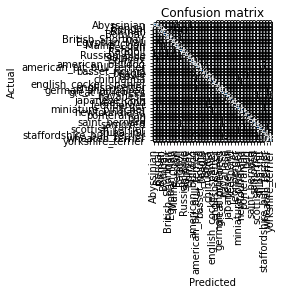

In [39]:
interp.plot_confusion_matrix()

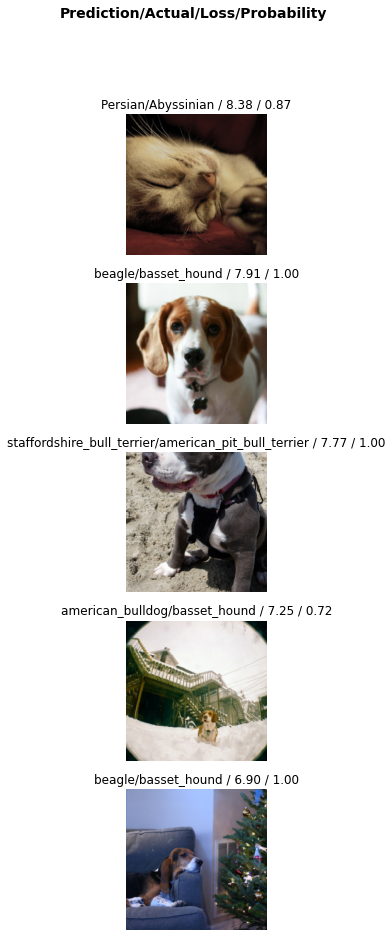

In [44]:
interp.plot_top_losses(5,nrows=5)

In [45]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [46]:
learn.loss

TensorBase([3.8350e-03, 1.8490e-02, 6.3895e-02, 1.8929e-04, 2.0266e-06, 2.5448e-04],
       device='cuda:0')

In [47]:
x,y = dls.one_batch()

In [48]:
len(x), len(y)

(64, 64)

In [52]:
dls.c


37

In [53]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [54]:
preds,targets = learn.get_preds(dl=[(x,y)])


In [59]:
targets

TensorCategory([21,  3, 23,  8, 21, 20, 31, 36, 18, 25, 18, 29, 26, 16, 15,  2, 21, 35,
        31, 10,  3,  9, 29, 15, 15,  2, 30, 25, 34, 16, 11, 28, 30,  0, 30,  7,
        16, 23,  8, 36,  9,  8, 14,  8, 32, 30, 23, 26, 14, 14, 30, 27,  3, 16,
         5,  0,  2, 15,  2,  4, 16, 22, 12,  1])

In [60]:
y

TensorCategory([21,  3, 23,  8, 21, 20, 31, 36, 18, 25, 18, 29, 26, 16, 15,  2, 21, 35,
        31, 10,  3,  9, 29, 15, 15,  2, 30, 25, 34, 16, 11, 28, 30,  0, 30,  7,
        16, 23,  8, 36,  9,  8, 14,  8, 32, 30, 23, 26, 14, 14, 30, 27,  3, 16,
         5,  0,  2, 15,  2,  4, 16, 22, 12,  1], device='cuda:0')

In [65]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
        

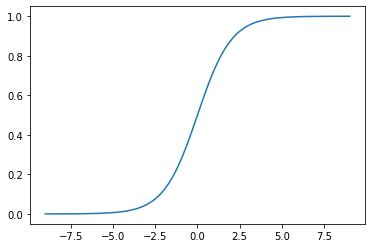

In [67]:
plot_function(torch.sigmoid,min=-9,max=9)

In [72]:
torch.random.manual_seed(42)
threeOrSeven = torch.randn((6,2));print(threeOrSeven)
act = torch.randn((6,2))*2; act

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863],
        [ 2.2082, -0.6380],
        [ 0.4617,  0.2674],
        [ 0.5349,  0.8094]])


tensor([[ 2.2206, -3.3796],
        [-1.9779,  1.9159],
        [ 2.6443,  1.6344],
        [-1.5317, -1.5012],
        [ 2.7051,  1.3726],
        [-0.6555,  1.5899]])

In [83]:
act.shape

torch.Size([6, 2])

In [89]:
len(act.size())

2

In [92]:
act.sigmoid_()

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [93]:
act

tensor([[0.9021, 0.0329],
        [0.1215, 0.8717],
        [0.9337, 0.8368],
        [0.1777, 0.1822],
        [0.9373, 0.7978],
        [0.3417, 0.8306]])

In [95]:
act[:,0]

tensor([0.9021, 0.1215, 0.9337, 0.1777, 0.9373, 0.3417])

In [96]:
act[:,1]

tensor([0.0329, 0.8717, 0.8368, 0.1822, 0.7978, 0.8306])

In [101]:
diff = act[:,0]-act[:,1]
diff.sigmoid_()

tensor([0.6766, 0.0758, 0.3087, 0.2672, 0.3272, 0.1216])

In [102]:
act[:,0] = diff

In [103]:
act[:,1] = 1-diff

In [104]:
act

tensor([[0.6766, 0.3234],
        [0.0758, 0.9242],
        [0.3087, 0.6913],
        [0.2672, 0.7328],
        [0.3272, 0.6728],
        [0.1216, 0.8784]])

In [111]:
act2 = torch.randn((6,2))*2; 
act3 = act2.clone().detach()
act2 


tensor([[ 4.2348, -3.4236],
        [ 0.3303,  3.1637],
        [ 0.8969,  0.0661],
        [ 2.9005, -1.3871],
        [ 1.9933,  1.2262],
        [ 1.5528, -0.6058]])

In [112]:
act3

tensor([[ 4.2348, -3.4236],
        [ 0.3303,  3.1637],
        [ 0.8969,  0.0661],
        [ 2.9005, -1.3871],
        [ 1.9933,  1.2262],
        [ 1.5528, -0.6058]])

In [113]:
act2.sigmoid_()

tensor([[0.9857, 0.0316],
        [0.5818, 0.9594],
        [0.7103, 0.5165],
        [0.9479, 0.1999],
        [0.8801, 0.7731],
        [0.8253, 0.3530]])

In [114]:
act3.sigmoid_()

tensor([[0.9857, 0.0316],
        [0.5818, 0.9594],
        [0.7103, 0.5165],
        [0.9479, 0.1999],
        [0.8801, 0.7731],
        [0.8253, 0.3530]])

In [115]:
diff2 = act2[:,0] - act2[:,1]
diff2.sigmoid_()

tensor([0.7220, 0.4067, 0.5483, 0.6787, 0.5267, 0.6159])

In [117]:
diff3 = act3[:,0]-act3[:,1]
diff3.sigmoid()

tensor([0.7220, 0.4067, 0.5483, 0.6787, 0.5267, 0.6159])

In [118]:
act2[:,0],act2[:,1]=diff2,1-diff2
act2

tensor([[0.7220, 0.2780],
        [0.4067, 0.5933],
        [0.5483, 0.4517],
        [0.6787, 0.3213],
        [0.5267, 0.4733],
        [0.6159, 0.3841]])

In [119]:
torch.stack([diff3.sigmoid(),1-diff3.sigmoid()],dim=1)

tensor([[0.7220, 0.2780],
        [0.4067, 0.5933],
        [0.5483, 0.4517],
        [0.6787, 0.3213],
        [0.5267, 0.4733],
        [0.6159, 0.3841]])

In [149]:
# sigmoid only used for binary problems for more than 2 classes we use sigmoid
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=1,keepdim=True)

In [150]:
softmax(torch.tensor([[2,3]]))

tensor([[0.2689, 0.7311]])

In [151]:
torch.exp(torch.tensor(2))

tensor(7.3891)

In [152]:
softmax_acts = torch.softmax(act3,dim=1)
softmax_acts

tensor([[0.7220, 0.2780],
        [0.4067, 0.5933],
        [0.5483, 0.4517],
        [0.6787, 0.3213],
        [0.5267, 0.4733],
        [0.6159, 0.3841]])

In [153]:
# the value we calculated using sigmoid and the value calculated using softmax is same
# how awesome it is 
# the main advantage of softmax we can able to use in more than two classes also

In [23]:

# further findings
# what is @patch
# what is @delegates